### Read data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from load_mg_data import load_microgrid_data # no longer needed

In [2]:
dir = '../data/CityLearn2021-data/'
#df = load_microgrid_data(dir)

In [3]:
df = pd.read_csv('data.csv')
df = df.iloc[0:24*365*2,:]
df['Month'] = df['Month'].astype('category')
day_types=['Mon','Tue','Wed','Thu','Fri','Sat','Sun','Holiday']

In [15]:
df.columns

Index(['Month', 'Hour', 'DayType', 'Workday', 'DaylightSavings', 'Load',
       'Load_1', 'Load_2', 'Load_3', 'Load_4', 'Load_5', 'Load_6', 'Load_7',
       'Load_8', 'Load_9', 'SolarGen', 'NetLoad', 'Price',
       'Outdoor Drybulb Temperature [C]', 'Outdoor Relative Humidity [%]',
       'Diffuse Solar Radiation [W/m2]', 'Direct Solar Radiation [W/m2]',
       '6h Prediction Outdoor Drybulb Temperature [C]',
       '12h Prediction Outdoor Drybulb Temperature [C]',
       '24h Prediction Outdoor Drybulb Temperature [C]',
       '6h Prediction Outdoor Relative Humidity [%]',
       '12h Prediction Outdoor Relative Humidity [%]',
       '24h Prediction Outdoor Relative Humidity [%]',
       '6h Prediction Diffuse Solar Radiation [W/m2]',
       '12h Prediction Diffuse Solar Radiation [W/m2]',
       '24h Prediction Diffuse Solar Radiation [W/m2]',
       '6h Prediction Direct Solar Radiation [W/m2]',
       '12h Prediction Direct Solar Radiation [W/m2]',
       '24h Prediction Direct So

### Load by day, by hour

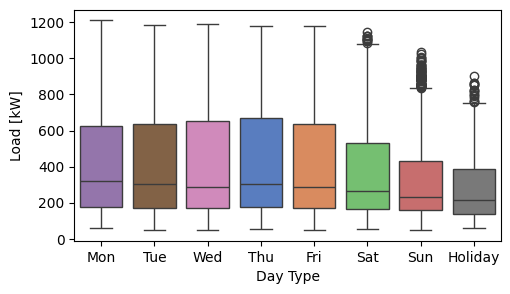

In [7]:
plt.figure(figsize=(5.5,3))
sns.boxplot(x='DayType', y='Load', hue='DayType'
            , data=df 
            ,order=day_types
            ,palette='muted'
            )
plt.xlabel('Day Type')
plt.ylabel('Load [kW]')
#plt.title('',fontsize=12, fontweight='bold')
plt.savefig('./plots/TX_boxplot_daytype.pdf', format='pdf', bbox_inches='tight')

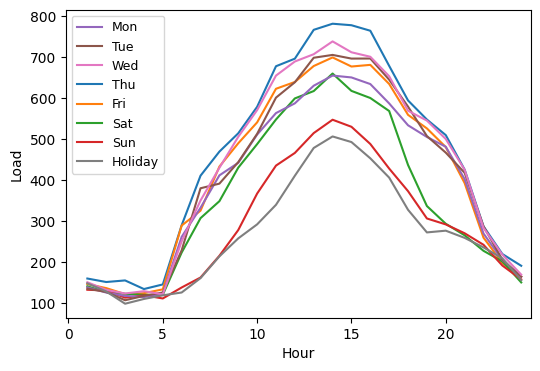

In [8]:
# plt.figure(figsize=(6,4))
# for day_type in day_types:
#     df_daytype = pd.DataFrame(df[df['DayType']==day_type].groupby('Hour')['Load'].median())
#     sns.lineplot(x='Hour', y='Load', data=df_daytype,label=day_type)
    
# plt.legend(loc='upper left',fontsize=9)
# plt.xlim(xmax=24.5)
# plt.show()


plt.figure(figsize=(6,4))
sns.lineplot(x='Hour',y='Load',hue='DayType',data=df
             ,estimator=np.median
             ,errorbar=None#,palette='muted'
             )

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[labels.index(day_type)] for day_type in day_types]
           ,day_types,loc='upper left',fontsize=9)
plt.xlim(xmax=24.5)
plt.savefig('./plots/TX_hour_daytype.pdf', format='pdf',bbox_inches='tight')

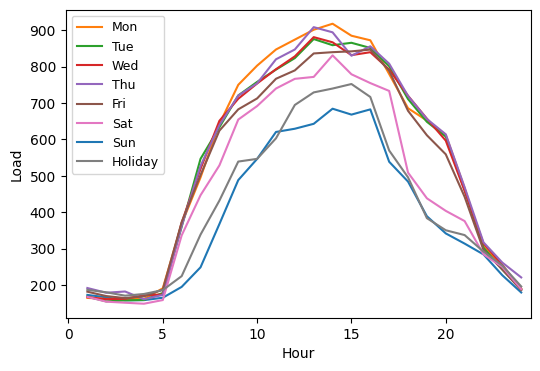

In [9]:
plt.figure(figsize=(6,4))
sns.lineplot(x='Hour',y='Load',hue='DayType',data=df.loc[df['DaylightSavings']==1,:]
             ,estimator=np.median
             ,errorbar=None#,palette='muted'
             )

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[labels.index(day_type)] for day_type in day_types]
           ,day_types,loc='upper left',fontsize=9)
plt.xlim(xmax=24.5)
plt.show()

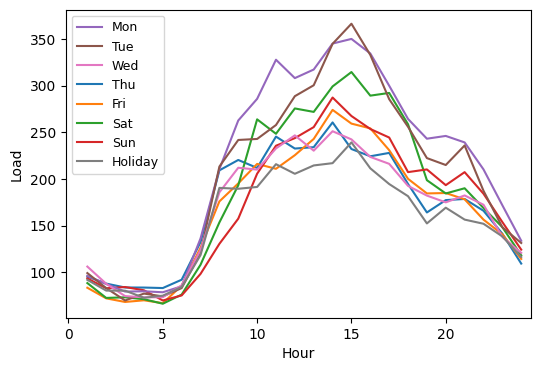

In [10]:
plt.figure(figsize=(6,4))
sns.lineplot(x='Hour',y='Load',hue='DayType',data=df.loc[df['DaylightSavings']==0,:]
             ,estimator=np.median
             ,errorbar=None#,palette='muted'
             )

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[labels.index(day_type)] for day_type in day_types]
           ,day_types,loc='upper left',fontsize=9)
plt.xlim(xmax=24.5)
plt.show()

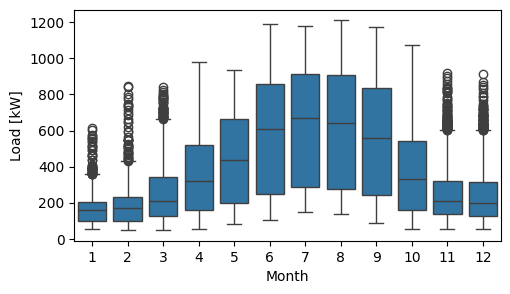

In [11]:
plt.figure(figsize=(5.5,3))
sns.boxplot(x='Month', y='Load'
            #, hue='Month'
            , data=df 
            #,color='lightblue'
            #,palette='muted'
            )
plt.xlabel('Month')
plt.ylabel('Load [kW]')
#plt.title('',fontsize=12, fontweight='bold')
plt.savefig('./plots/TX_boxplot_month.pdf', format='pdf', bbox_inches='tight')

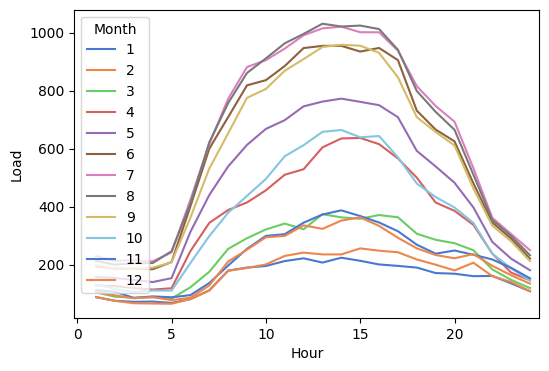

<Figure size 640x480 with 0 Axes>

In [12]:
plt.figure(figsize=(6,4))
sns.lineplot(x='Hour',y='Load',hue='Month',data=df
             ,estimator=np.median
             ,errorbar=None,palette='muted'
             )

plt.xlim(xmax=24.5)
plt.show()
plt.savefig('./plots/TX_byhour_bymonth.pdf', format='pdf')

### Scatterplots

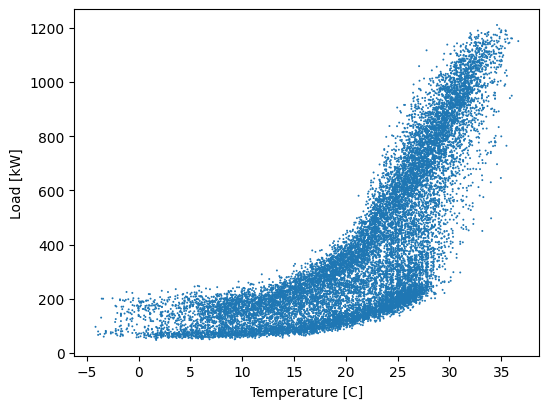

In [13]:
plt.figure(figsize=(6,4.5))
sns.scatterplot(x='Outdoor Drybulb Temperature [C]',y='Load'
                #,hue='Hour'
                ,s=2
                ,alpha=1
                ,edgecolor="none"
                ,data=df)
plt.xlabel('Temperature [C]')
plt.ylabel('Load [kW]')
plt.savefig('./plots/TX_temper_load.pdf', format='pdf', bbox_inches='tight')

C:\Users\Altafloresta\AppData\Local\Temp\ipykernel_25292\719876294.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  spectral = cm.get_cmap('Spectral', 12)


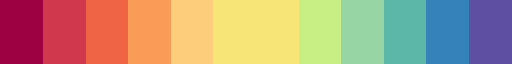

In [25]:
from matplotlib import cm, colors
spectral = cm.get_cmap('Spectral', 12)
new_spectral = spectral(np.arange(0,12))
new_spectral[5] = np.array([248/256, 230/256, 120/256, 1])
new_spectral[6] = np.array([248/256, 230/256, 120/256, 1])
new_spectral[7] = np.array([200/256, 240/256, 133/256, 1])
new_spectral_cmp = colors.ListedColormap(new_spectral)
new_spectral_cmp

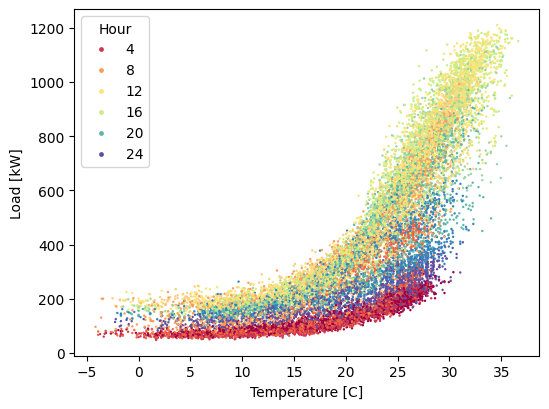

In [26]:
plt.figure(figsize=(6,4.5))
sns.scatterplot(x='Outdoor Drybulb Temperature [C]',y='Load'
                ,hue='Hour'
                ,s=3
                ,alpha=1
                ,edgecolor="none"
                ,palette=new_spectral_cmp # 'Spectral'
                ,data=df)
plt.legend(title='Hour',markerscale=2)
plt.xlabel('Temperature [C]')
plt.ylabel('Load [kW]')
plt.savefig('./plots/TX_temper_load_byhour.pdf', format='pdf', bbox_inches='tight')

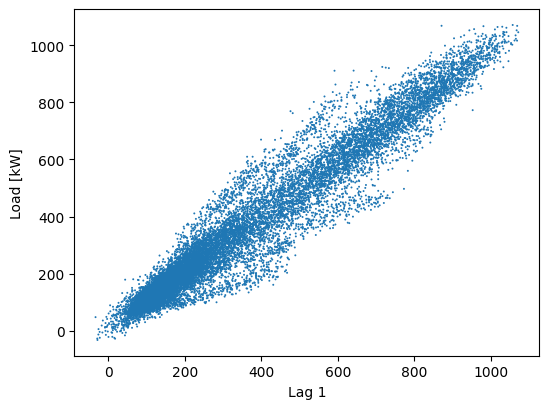

In [51]:
plt.figure(figsize=(6,4.5))
sns.scatterplot(x='NetLoad',y='NetLoadLag'
                #,hue='Hour'
                ,s=2
                ,alpha=1
                ,edgecolor="none"
                ,data=df)
plt.xlabel('Lag 1')
plt.ylabel('Load [kW]')
plt.savefig('./plots/TX_netloadlag.pdf', format='pdf', bbox_inches='tight')

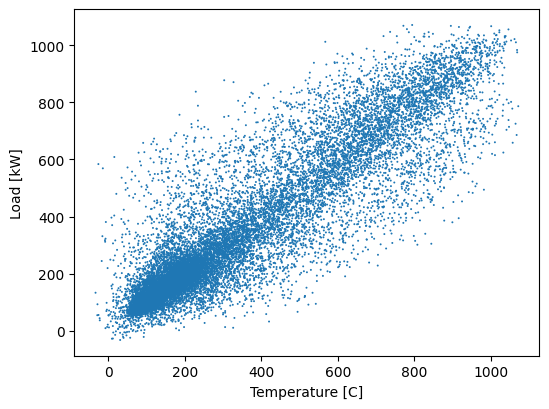

In [50]:
plt.figure(figsize=(6,4.5))
sns.scatterplot(x='NetLoad',y='NetLoadLag24'
                #,hue='Hour'
                ,s=2
                ,alpha=1
                ,edgecolor="none"
                ,data=df)
plt.xlabel('Lag 24')
plt.ylabel('Load [kW]')
plt.savefig('./plots/TX_netloadlag24.pdf', format='pdf', bbox_inches='tight')

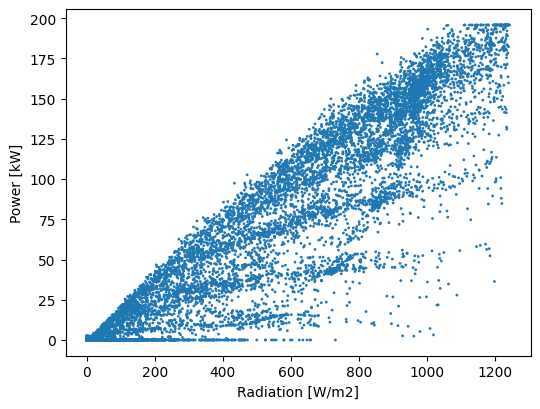

In [52]:
plt.figure(figsize=(6,4.5))
sns.scatterplot(x='Radiation [W/m2]',y='SolarGen'
                #,hue='DaylightSavings'
                ,s=4
                ,edgecolor="none"
                ,data=df)
# plt.xlabel('Temperature [C]')
plt.ylabel('Power [kW]')
plt.savefig('./plots/TX_radiation_generation.pdf', format='pdf', bbox_inches='tight')

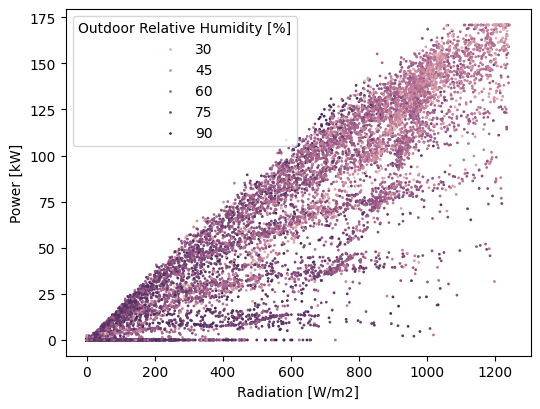

In [17]:
plt.figure(figsize=(6,4.5))
sns.scatterplot(x='Radiation [W/m2]',y='SolarGen'
                ,hue='Outdoor Relative Humidity [%]'
                ,s=4
                ,edgecolor="none"
                ,data=df)
# plt.xlabel('Temperature [C]')
plt.ylabel('Power [kW]')
plt.savefig('./plots/TX_radiation_generation_byhour.pdf', format='pdf', bbox_inches='tight')

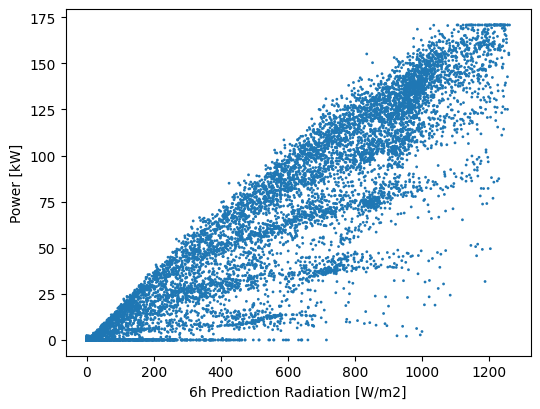

In [18]:
plt.figure(figsize=(6,4.5))
sns.scatterplot(x='6h Prediction Radiation [W/m2]',y='SolarGen'
                #,hue='DaylightSavings'
                ,s=4
                ,edgecolor="none"
                ,data=df)
# plt.xlabel('Temperature [C]')
plt.ylabel('Power [kW]')
plt.savefig('./plots/TX_radiation_generation.pdf', format='pdf', bbox_inches='tight')

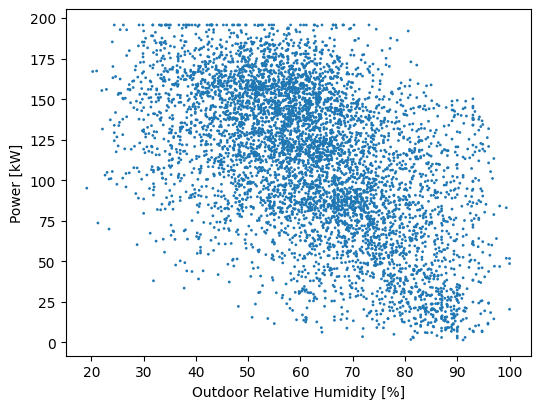

In [53]:
plt.figure(figsize=(6,4.5))
sns.scatterplot(x='Outdoor Relative Humidity [%]',y='SolarGen'
                #,hue='Hour'
                ,s=4
                ,edgecolor="none"
                #,palette='Spectral'
                ,data=df[df['Hour'].between(9, 16)])
# plt.xlabel('Temperature [C]')
plt.ylabel('Power [kW]')
plt.savefig('./plots/TX_humidity_generation_middle_of_day.pdf', format='pdf', bbox_inches='tight')

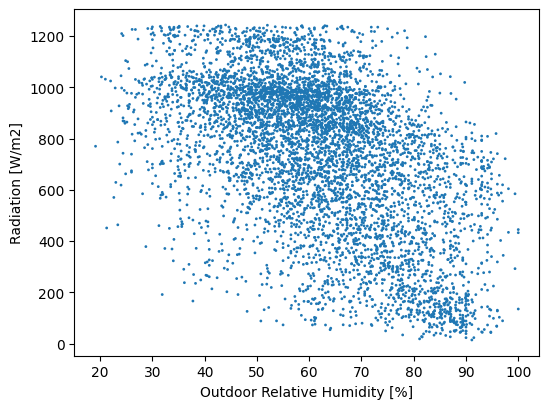

In [8]:
plt.figure(figsize=(6,4.5))
sns.scatterplot(x='Outdoor Relative Humidity [%]',y='Radiation [W/m2]'
                #,hue='Hour'
                ,s=4
                ,edgecolor="none"
                #,palette='Spectral'
                ,data=df[df['Hour'].between(9, 16)])
plt.savefig('./plots/TX_humidity_radiation.pdf', format='pdf', bbox_inches='tight')

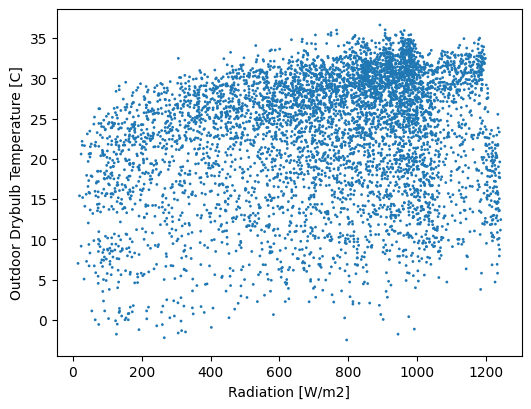

In [9]:
plt.figure(figsize=(6,4.5))
sns.scatterplot(x='Radiation [W/m2]',y='Outdoor Drybulb Temperature [C]'
                #,hue='DaylightSavings'
                ,s=4
                ,edgecolor="none"
                ,data=df[df['Hour'].between(9, 16)])

plt.savefig('./plots/TX_radiation_temperature.pdf', format='pdf', bbox_inches='tight')

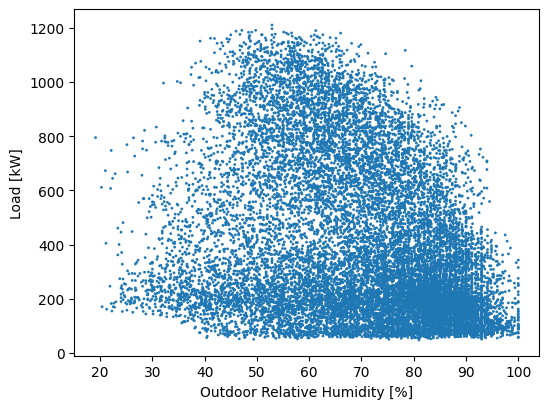

In [116]:
plt.figure(figsize=(6,4.5))
sns.scatterplot(x='Outdoor Relative Humidity [%]',y='Load'
                #,hue='DaylightSavings'
                ,s=4
                ,edgecolor="none"
                ,data=df)
# plt.xlabel('Temperature [C]')
plt.ylabel('Load [kW]')
plt.savefig('./plots/TX_humidity_load.pdf', format='pdf', bbox_inches='tight')

In [56]:
df.columns

Index(['Month', 'Hour', 'DayType', 'DaylightSavings', 'Load', 'Load_1',
       'Load_2', 'Load_3', 'Load_4', 'Load_5', 'Load_6', 'Load_7', 'Load_8',
       'Load_9', 'SolarGen', 'Price', 'Outdoor Drybulb Temperature [C]',
       'Outdoor Relative Humidity [%]', 'Diffuse Solar Radiation [W/m2]',
       'Direct Solar Radiation [W/m2]',
       '6h Prediction Outdoor Drybulb Temperature [C]',
       '12h Prediction Outdoor Drybulb Temperature [C]',
       '24h Prediction Outdoor Drybulb Temperature [C]',
       '6h Prediction Outdoor Relative Humidity [%]',
       '12h Prediction Outdoor Relative Humidity [%]',
       '24h Prediction Outdoor Relative Humidity [%]',
       '6h Prediction Diffuse Solar Radiation [W/m2]',
       '12h Prediction Diffuse Solar Radiation [W/m2]',
       '24h Prediction Diffuse Solar Radiation [W/m2]',
       '6h Prediction Direct Solar Radiation [W/m2]',
       '12h Prediction Direct Solar Radiation [W/m2]',
       '24h Prediction Direct Solar Radiation [W/m2]',

### Time series plots

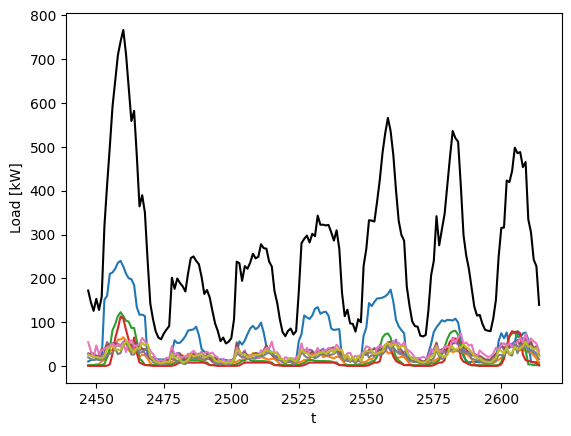

In [48]:
df2 = df[(df['Timestamp']>='2016-04-13') & (df['Timestamp']<='2016-04-20')]
df2['Load'].plot(color='black')
df2['Load_1'].plot()
df2['Load_2'].plot()
df2['Load_3'].plot()
df2['Load_4'].plot()
df2['Load_5'].plot()
df2['Load_6'].plot()
df2['Load_7'].plot()
df2['Load_8'].plot()
df2['Load_9'].plot()
plt.xlabel('t')
plt.ylabel('Load [kW]')
plt.savefig('./plots/TX_load_1week.pdf', format='pdf', bbox_inches='tight')

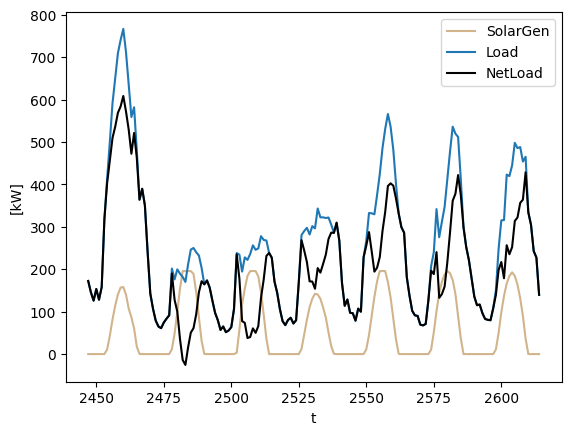

In [43]:
df2 = df[(df['Timestamp']>='2016-04-13') & (df['Timestamp']<='2016-04-20')]
df2['SolarGen'].plot(color='tan')
df2['Load'].plot()
df2['NetLoad'].plot(color='black')
plt.legend()
plt.ylabel('[kW]')
plt.xlabel('t')
plt.savefig('./plots/TX_netload_1week.pdf', format='pdf', bbox_inches='tight')

Text(0.5, 0, 't')

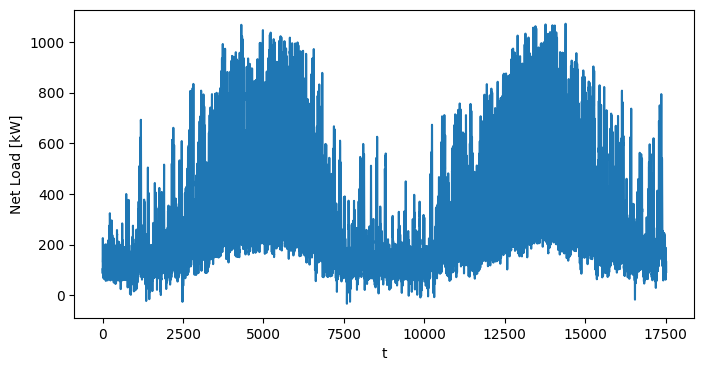

In [51]:
plt.figure(figsize=(8,4))
df['NetLoad'].plot()
plt.ylabel('Net Load [kW]')
plt.xlabel('t')

<Axes: >

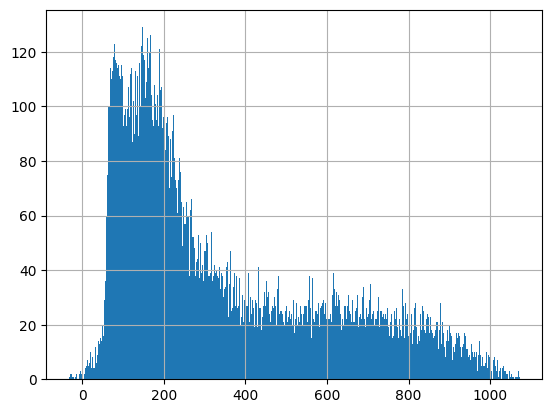

In [45]:
df['NetLoad'].hist(bins=500)

In [143]:
df[(df['Timestamp']>='2016-04-14') & (df['Timestamp']<='2016-04-19')]

,Month,Hour,DayType,Workday,DaylightSavings,Load,Load_1,Load_2,Load_3,Load_4,...,12h Prediction Outdoor Relative Humidity [%],24h Prediction Outdoor Relative Humidity [%],6h Prediction Diffuse Solar Radiation [W/m2],12h Prediction Diffuse Solar Radiation [W/m2],24h Prediction Diffuse Solar Radiation [W/m2],6h Prediction Direct Solar Radiation [W/m2],12h Prediction Direct Solar Radiation [W/m2],24h Prediction Direct Solar Radiation [W/m2],Radiation [W/m2],Timestamp
2471,4,24,Mon,True,1,107.09,14.37,2.38,2.36,0.44,...,94.15,95.31,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2016-04-14 00:00:00
2472,4,1,Tue,True,1,79.07,14.93,1.92,2.36,0.44,...,92.35,92.32,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2016-04-14 01:00:00
2473,4,2,Tue,True,1,65.14,15.46,2.37,2.36,0.44,...,90.80,93.34,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2016-04-14 02:00:00
2474,4,3,Tue,True,1,61.07,15.20,1.92,2.36,0.44,...,82.19,81.51,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2016-04-14 03:00:00
2475,4,4,Tue,True,1,74.33,15.00,3.27,2.36,0.44,...,88.82,92.88,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2016-04-14 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2586,4,19,Sat,False,1,299.26,28.97,27.08,21.52,10.14,...,50.53,49.30,3.16,3.19,3.27,145.89,147.6,151.01,147.31,2016-04-18 19:00:00
2587,4,20,Sat,False,1,252.55,8.60,28.06,13.25,7.56,...,50.34,49.68,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2016-04-18 20:00:00
2588,4,21,Sat,False,1,221.63,8.70,22.77,7.59,3.91,...,60.68,62.25,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2016-04-18 21:00:00
2589,4,22,Sat,False,1,177.88,9.60,16.36,1.77,2.35,...,69.14,69.90,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2016-04-18 22:00:00


In [16]:
df2.loc[(df['DaylightSavings']==0) & (df['DayType']=='Tue') & (df['Hour']==7),'Load'].mean()

136.05

In [17]:
df2.loc[(df['DaylightSavings']==1) & (df['DayType']=='Tue') & (df['Hour']==7),'Load'].mean()

204.29666666666665

<Axes: >

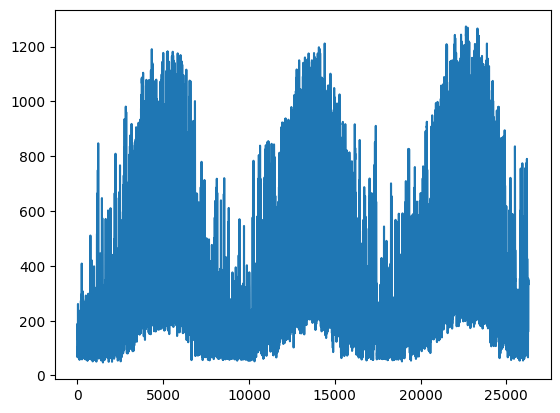

In [18]:
df['Load'].plot()

In [ ]:
plt.plot(df["Time"], df["Load"])
plt.xlabel("Date")
plt.ylabel("Sales (USD)")
plt.show()

In [1]:
df.index

NameError: name 'df' is not defined